In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
test=pd.read_csv(r"C:\Users\hp\Desktop\Data Science\test_QaJU1Mh.csv")

In [3]:
train=pd.read_csv(r"C:\Users\hp\Desktop\Data Science\train_jRxnrHD.csv")

In [4]:
test['application_underwriting_score'].fillna(test['application_underwriting_score'].mean(), inplace=True)

In [5]:
test['Count_3-6_months_late'].fillna(0, inplace=True)

In [6]:
test['Count_6-12_months_late'].fillna(0, inplace=True)

In [7]:
test['Count_more_than_12_months_late'].fillna(0, inplace=True)

In [8]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

In [9]:
train['application_underwriting_score'].fillna(train['application_underwriting_score'].mean(), inplace=True)
train['Count_3-6_months_late'].fillna(0, inplace=True)
train['Count_6-12_months_late'].fillna(0, inplace=True)
train['Count_more_than_12_months_late'].fillna(0, inplace=True)

In [10]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
target                              0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
train.corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005643,-0.002117,0.003429,-0.002085,-0.003328,0.003430,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.213011,0.213953,0.167213,-0.138006,-0.152837,-0.067523,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.057874,-0.072439,-0.059114,0.047954,0.176544,0.074070,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001296,-0.017292,-0.012341,0.062637,0.079078,0.302825,0.016541
Count_3-6_months_late,-0.005643,0.213011,-0.057874,-0.001296,1.000000,0.204286,0.296139,-0.082306,0.076435,-0.000819,-0.246469
Count_6-12_months_late,-0.002117,0.213953,-0.072439,-0.017292,0.204286,1.000000,0.266337,0.004581,-0.092593,-0.043642,-0.284034
Count_more_than_12_months_late,0.003429,0.167213,-0.059114,-0.012341,0.296139,0.266337,1.000000,-0.031527,-0.021409,-0.023462,-0.238482
application_underwriting_score,-0.002085,-0.138006,0.047954,0.062637,-0.082306,0.004581,-0.031527,1.000000,-0.262585,0.132775,0.067333
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.076435,-0.092593,-0.021409,-0.262585,1.000000,0.191889,0.022664
premium,0.003430,-0.067523,0.074070,0.302825,-0.000819,-0.043642,-0.023462,0.132775,0.191889,1.000000,0.036416


# Univariate Outlier Detection

In [13]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
premium                               int64
target                                int64
dtype: object

In [14]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248369,0.078093,0.059935,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691102,0.436251,0.311840,0.725892,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.830000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.180000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.520000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


In [15]:
train.loc[train['no_of_premiums_paid']>22,'no_of_premiums_paid']=np.mean(train['no_of_premiums_paid'])

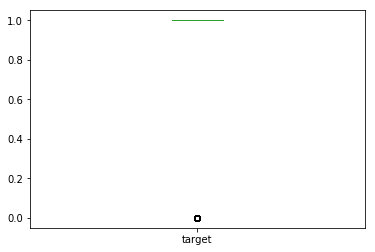

In [16]:
train['target'].plot.box()


In [17]:
#test.loc[test['Income']>200,'Income']=np.mean(test['Income'])

In [18]:
train.loc[train['premium']>20000,'premium']=np.mean(train['premium'])

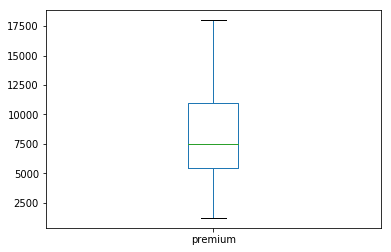

In [19]:
#plotting boxplots for the age variable 

train['premium'].plot.box()


In [21]:
#train[''].plot.box()


In [22]:
test.loc[test['age_in_days']>34000,'age_in_days']=np.mean(test['age_in_days'])

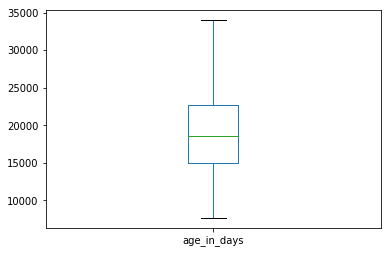

In [23]:
#plotting boxplots for the age variable 

test['age_in_days'].plot.box()


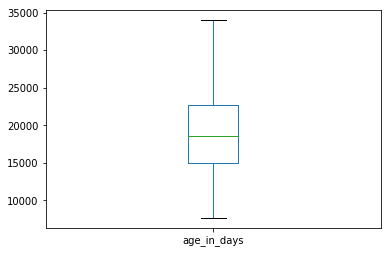

In [24]:
train.loc[train['age_in_days']>34000,'age_in_days']=np.mean(train['age_in_days'])
train['age_in_days'].plot.box()

In [25]:
train.loc[train['Count_more_than_12_months_late']>8,'Count_more_than_12_months_late']=np.mean(train['Count_more_than_12_months_late'])

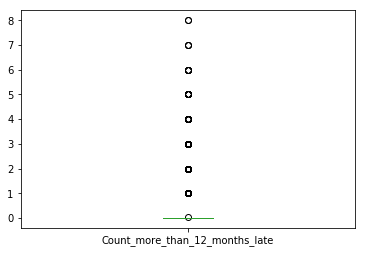

In [26]:

train['Count_more_than_12_months_late'].plot.box()


In [27]:
test.loc[test['Count_3-6_months_late']>8,'Count_3-6_months_late']=np.mean(test['Count_3-6_months_late'])

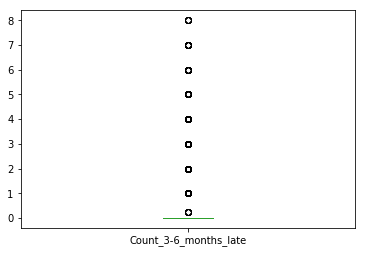

In [28]:

test['Count_3-6_months_late'].plot.box()


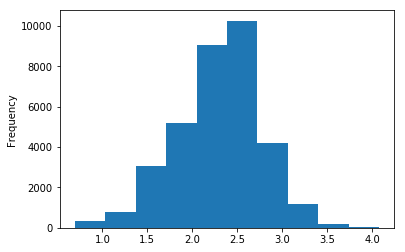

In [47]:
np.log(test['no_of_premiums_paid']).plot.hist()


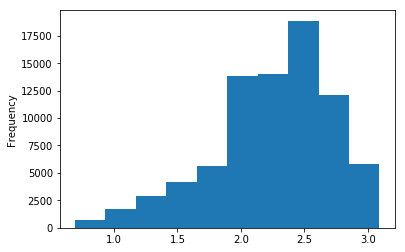

In [30]:
np.log(train['no_of_premiums_paid']).plot.hist()


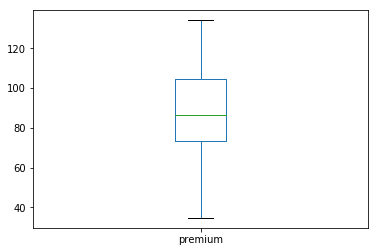

In [52]:

np.power(train['premium'],1/2).plot.box()


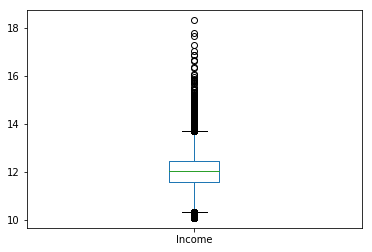

In [57]:

np.log(train['Income']).plot.box()


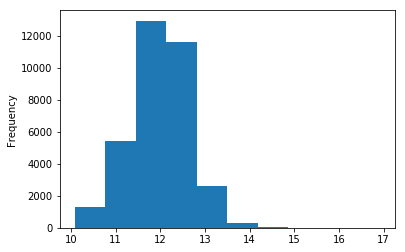

In [58]:



np.log(test['Income']).plot.hist()




# Variable Transformation

In [ ]:
test['age_in_days'].plot.hist()

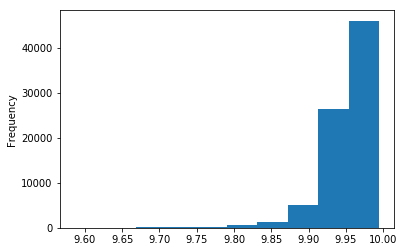

In [65]:
np.sqrt(train['application_underwriting_score']).plot.hist()

In [66]:
test.shape

(34224, 11)